In [ ]:
!pip install keras==2.3.1  # anacondaとバージョン合わせるため
!pip install tensorflow==2.1.0

In [1]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras_preprocessing.image import ImageDataGenerator

print(tensorflow.__version__)
print(keras.__version__)

2.1.0
2.3.1


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras import backend as K

batch_size = 64
epochs = 20
num_class = 10

y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

K.clear_session()
model = Sequential()

model.add(Conv2D(32,(3, 3), padding="same", input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(32,(3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64,(3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_class))
model.add(Activation("softmax"))

model.compile(optimizer=Adam(), loss="categorical_crossentropy",metrics=["acc"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)       

In [4]:
x_train = x_train / 255
x_test = x_test / 255

generator = ImageDataGenerator(
           rotation_range=0.2,
           width_shift_range=0.2,
           height_shift_range=0.2,
           shear_range=10,
           zoom_range=0.2,
           horizontal_flip=True)

generator.fit(x_train)

history = model.fit_generator(generator.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 26s 34ms/step - loss: 1.7726 - acc: 0.3398 - val_loss: 1.3607 - val_acc: 0.5019
Epoch 2/20
782/782 [==============================] - 24s 31ms/step - loss: 1.4726 - acc: 0.4624 - val_loss: 1.3242 - val_acc: 0.5325
Epoch 3/20
782/782 [==============================] - 24s 31ms/step - loss: 1.3284 - acc: 0.5218 - val_loss: 1.0955 - val_acc: 0.6055
Epoch 4/20
782/782 [==============================] - 24s 31ms/step - loss: 1.2405 - acc: 0.5566 - val_loss: 1.1432 - val_acc: 0.5900
Epoch 5/20
782/782 [==============================] - 24s 31ms/step - loss: 1.1696 - acc: 0.5868 - val_loss: 0.9728 - val_acc: 0.6565
Epoch 6/20
782/782 [==============================] - 24s 30ms/step - loss: 1.1200 - acc: 0.6049 - val_loss: 1.0961 - val_acc: 0.6236
Epoch 7/20
782/782 [==============================] - 24s 31ms/step - loss: 1.0706 - acc: 0.6225 - val_loss: 0.9386 - val_acc: 0.6751
Epoch 8/20
782/782 [==============================] - 24s 30ms

batch_size=32, epochs=20の場合

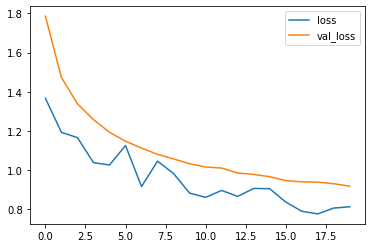

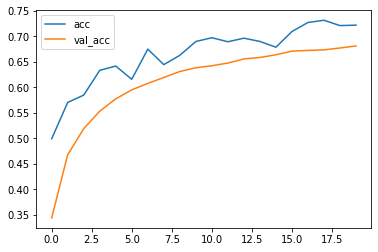

In [11]:
train_loss = history.history["loss"]
train_acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]

plt.plot(np.arange(len(train_loss)), val_loss, label="loss")
plt.plot(np.arange(len(val_loss)), train_loss, label="val_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), val_acc, label="acc")
plt.plot(np.arange(len(val_acc)), train_acc, label="val_acc")
plt.legend()
plt.show()

In [12]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

10000/10000 [==============================] - 1s 79us/step
0.8131117771148682 0.722000002861023


batch_size=64, epochs=20の場合

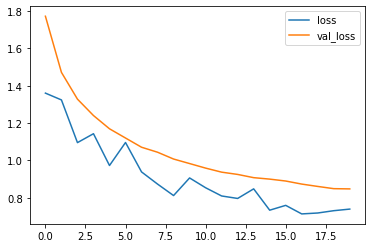

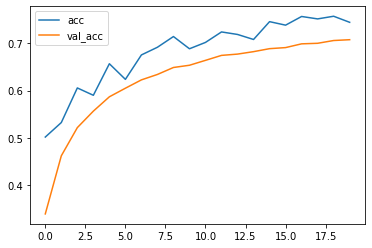

In [5]:
train_loss = history.history["loss"]
train_acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]

plt.plot(np.arange(len(train_loss)), val_loss, label="loss")
plt.plot(np.arange(len(val_loss)), train_loss, label="val_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), val_acc, label="acc")
plt.plot(np.arange(len(val_acc)), train_acc, label="val_acc")
plt.legend()
plt.show()

In [6]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

10000/10000 [==============================] - 1s 83us/step
0.7393152945518494 0.7439000010490417


batch_size=128, epochs=20の場合

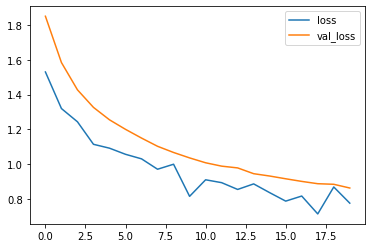

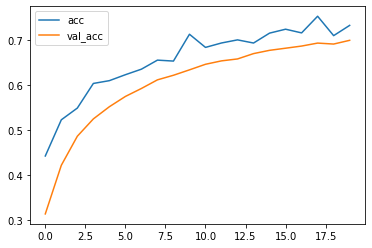

In [8]:
train_loss = history.history["loss"]
train_acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]

plt.plot(np.arange(len(train_loss)), val_loss, label="loss")
plt.plot(np.arange(len(val_loss)), train_loss, label="val_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), val_acc, label="acc")
plt.plot(np.arange(len(val_acc)), train_acc, label="val_acc")
plt.legend()
plt.show()

In [9]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

10000/10000 [==============================] - 1s 79us/step
0.7769719513893127 0.7325000166893005


In [7]:
from google.colab import files

model.save("image_classifier.h5",  include_optimizer=False)
files.download("image_classifier.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>